In [5]:
# Re-import necessary libraries after code execution state reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import defaultdict
import os

import os
cwd = os.getcwd()  
import importlib
print(cwd)  #the last part should be .../py-graspi/tests

def extract_numbers(filename):
    """Extract numbers from a filename for sorting and size extraction."""
    return tuple(map(int, re.findall(r'\d+', filename)))


def group_files_by_pattern(files):
    """Group file names by replacing numeric values with a placeholder (#)."""
    pattern_groups = defaultdict(list)
    for file in files:
        pattern = re.sub(r'\d+(?:\.\d+)?', '#', file)
        pattern_groups[pattern].append(file)
    return pattern_groups


def plot_execution_and_memory_by_repeated_size(csv_file):
    """
    Plot execution time and memory usage by input morphology size (in pixels),
    with x-axis as 'NxN' using extracted single numeric value from the filename.
    """
    df = pd.read_csv(csv_file)
    df['total_execution_time'] = df['descriptor_time'] + df['graph_time']
    df['peak_memory_usage'] = df[['graph_mem', 'descriptor_mem']].max(axis=1)

    # Extract a single number from the filename (e.g., 10 from "testfile-10-2D")
    df['size'] = df['Test File'].str.extract(r'(\d+)').astype(int)
    df['size_label'] = df['size'].astype(str) + 'x' + df['size'].astype(str)
    df['pixel_count'] = df['size'] ** 2

    pattern_groups = group_files_by_pattern(df['Test File'])

    for pattern, files in pattern_groups.items():
        subset = df[df['Test File'].isin(files)].copy()
        subset.sort_values('pixel_count', inplace=True)

        plt.figure(figsize=(12, 10))

        # Execution time plot
        ax1 = plt.subplot(2, 1, 1)
        ax1.plot(subset['size_label'], subset['total_execution_time'], marker='o', linestyle='-', color='blue')
        ax1.set_xlabel('Input Morphology Size (pixels)')
        ax1.set_ylabel('Time (s)')
        ax1.set_title(f'Total Execution Time - {pattern}')
        ax1.grid(True)

        # Memory usage plot
        ax2 = plt.subplot(2, 1, 2)
        ax2.plot(subset['size_label'], subset['peak_memory_usage'], marker='s', linestyle='-', color='green')
        ax2.set_xlabel('Input Morphology Size (pixels)')
        ax2.set_ylabel('Memory Usage (bytes)')
        ax2.set_title(f'Peak Memory Usage - {pattern}')
        ax2.grid(True)

        plt.tight_layout(pad=2.0)
        plt.show()

/Users/hwi/Develop/ClassSrc/CSE302/py-graspi/tests


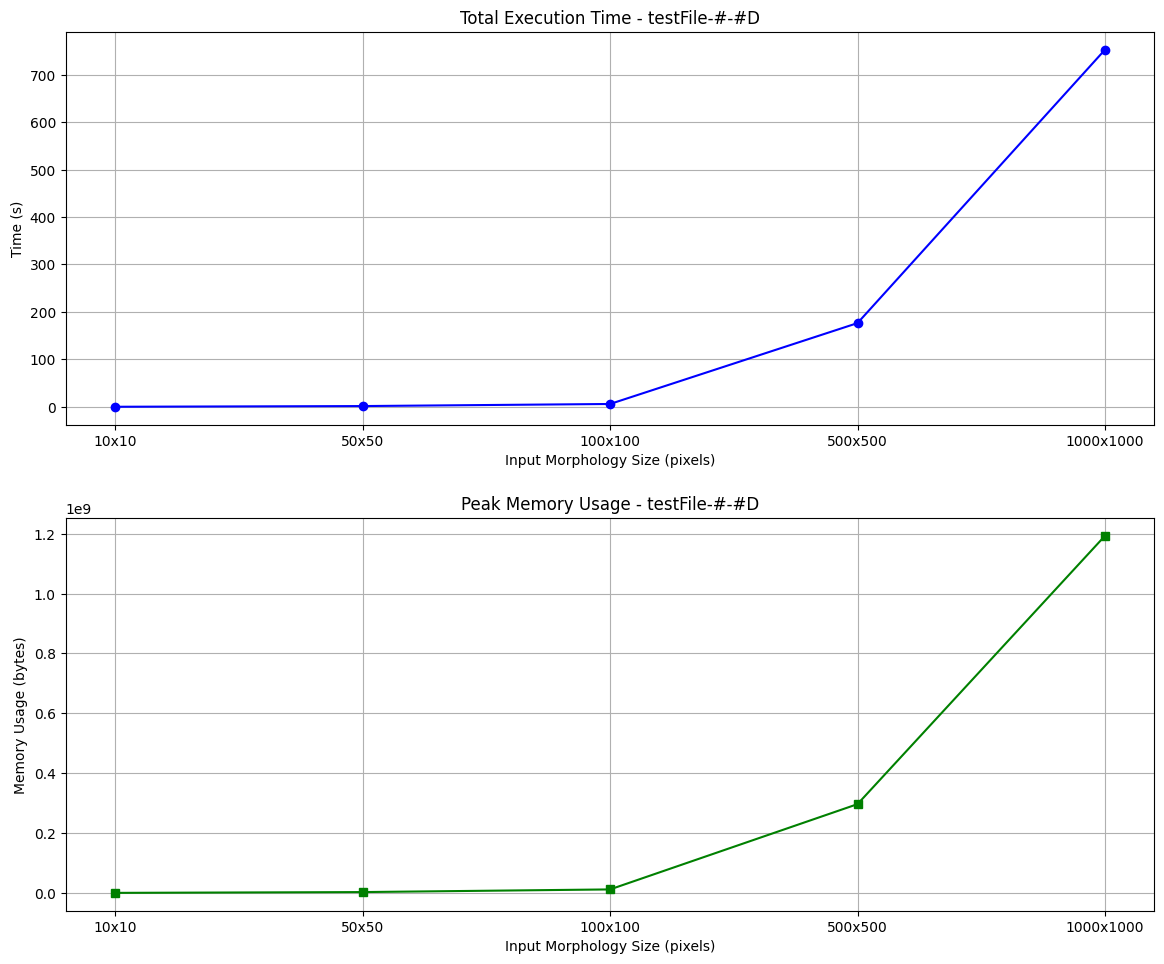

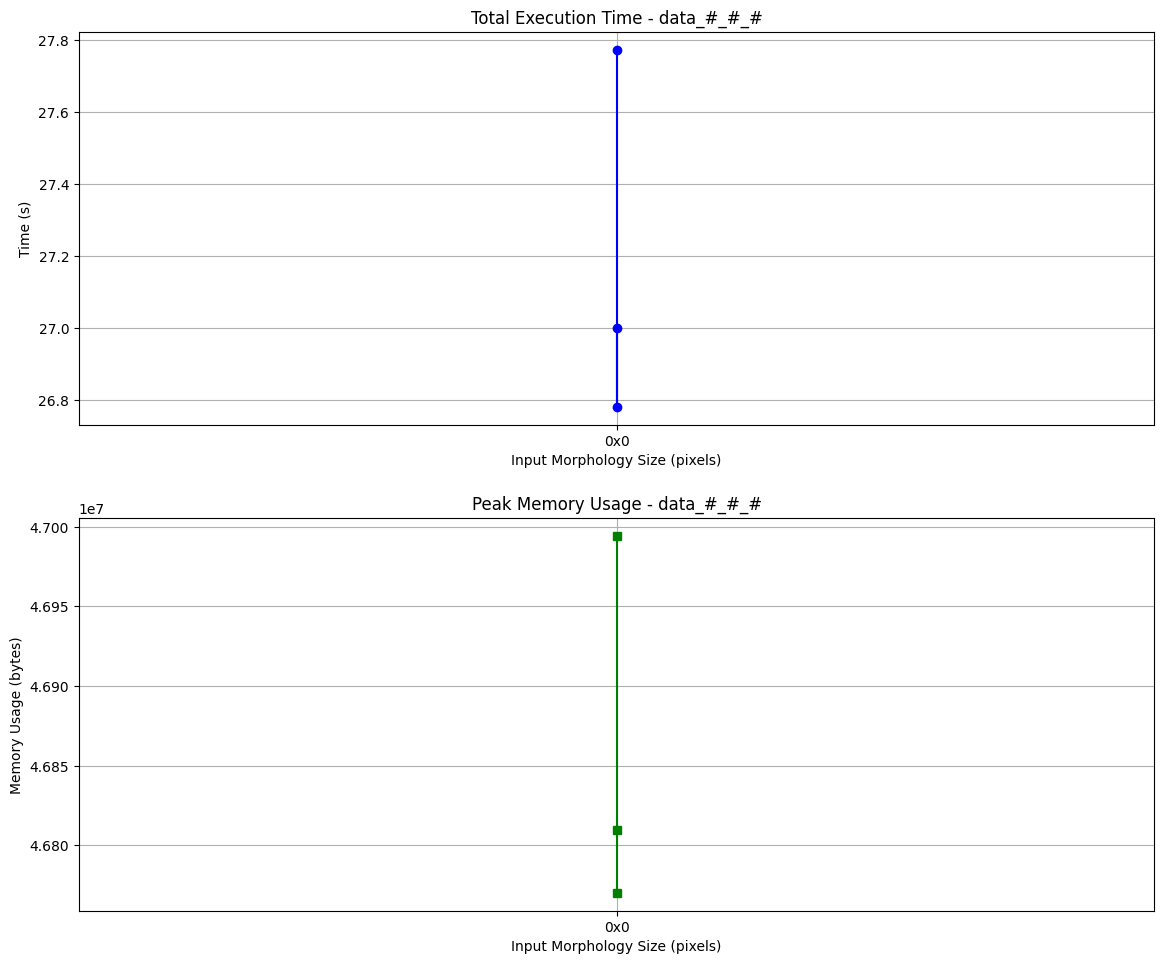

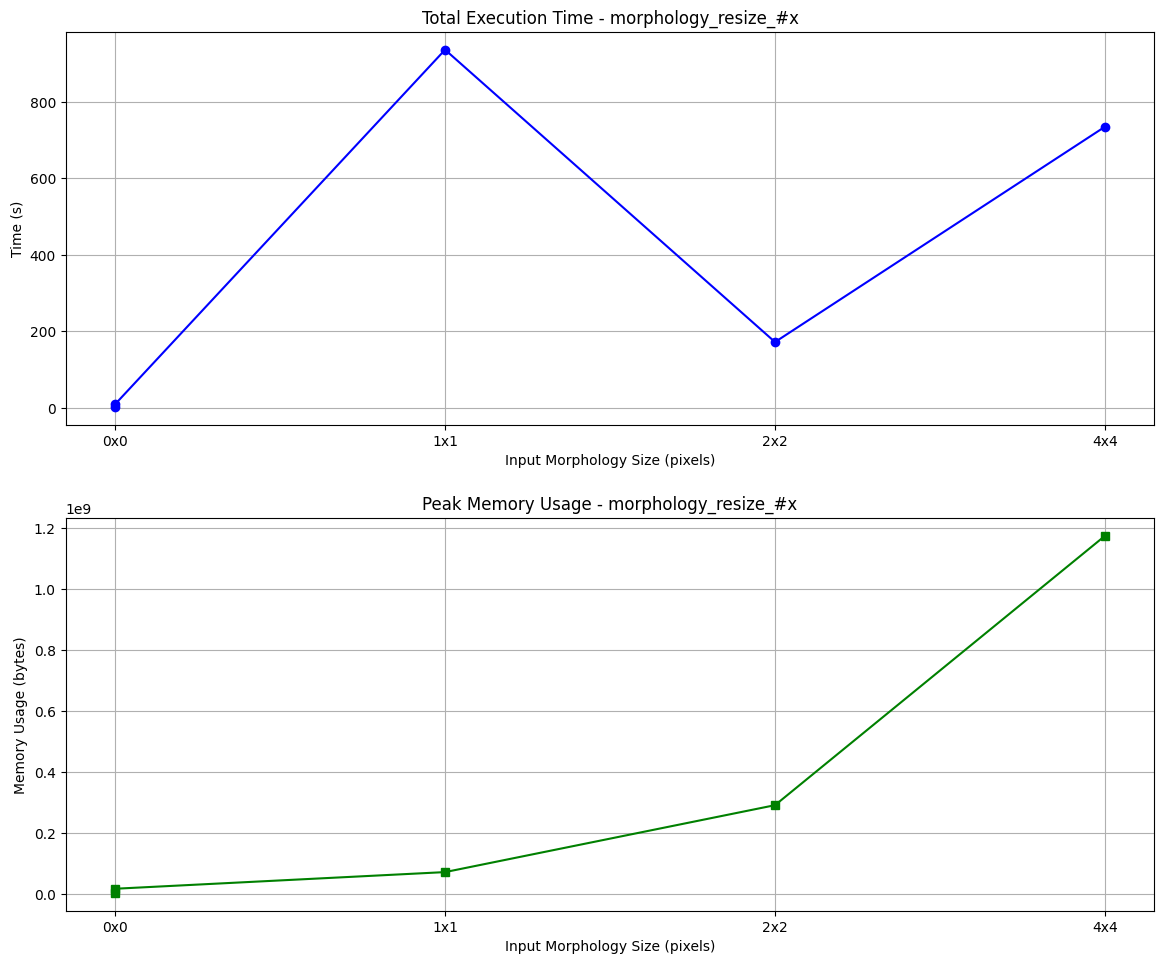

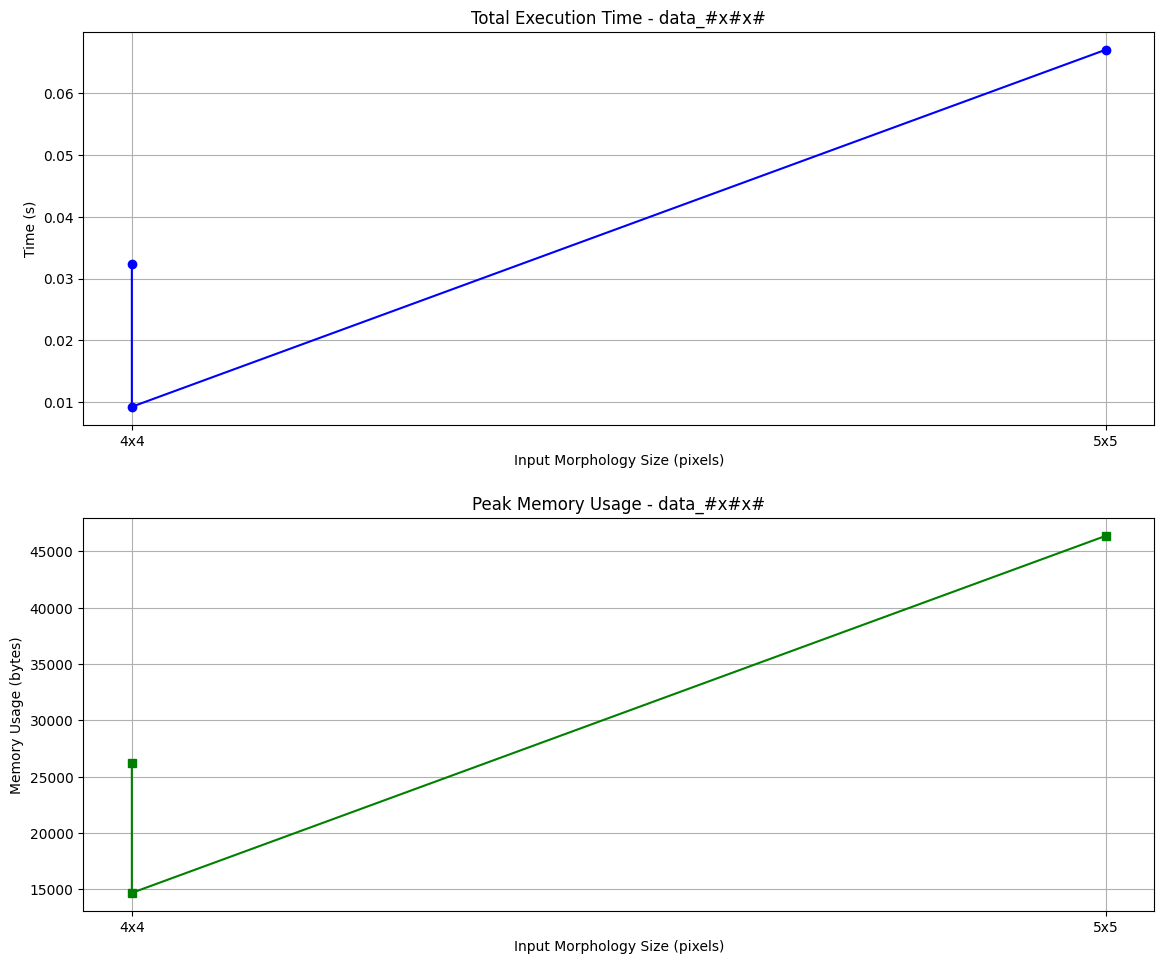

In [6]:
plot_execution_and_memory_by_repeated_size(cwd+"/performance/stats_main_igraph.csv")